**Import the required libraries**

In [1]:
## import basic libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

**Read the data from the input csv file**

In [2]:
bike=pd.read_csv("day.csv")
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
len(bike)

730

In [4]:
## check the shape of data set
bike.shape

(730, 16)

In [5]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Check the information of the dataset which includes the number of columns in the dataset and type of columns**

In [6]:
## check the descriptive information 
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
## check the missing values 
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
bike.isna().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

In [9]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Dataset Detailes 
- Dataset has 730 rows and 16 columns
- Except one column , all other columns are float and integer values 
- The one column is date type 
- we will analyse and finalyze whether to convert them to categorical or treat as integer 

In [10]:
## checking is there any duplicated values in data set 
bike_dup = bike.duplicated()
bike_dup

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

In [11]:
## droping the duplicated values in data set 
bike_dup = bike_dup.drop_duplicates()
bike_dup

0    False
dtype: bool

# Exploratory Data Analysis(EDA)

In [12]:
## Data Cleaning
#-Checking the value counts for entire dataset.This will be hepl to identify any unknown or junk values present in the dataset

In [13]:
bike['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [14]:
bike["hum"].value_counts()

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64

In [15]:
bike["instant"].value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

In [16]:
bike["registered"].value_counts()

4841    3
6248    3
1707    3
3461    2
2713    2
       ..
4138    1
3231    1
4018    1
3077    1
2290    1
Name: registered, Length: 678, dtype: int64

In [17]:
bike["cnt"].value_counts()

5409    2
2424    2
5698    2
4459    2
5119    2
       ..
5345    1
5046    1
4713    1
4763    1
2729    1
Name: cnt, Length: 695, dtype: int64

In [18]:
bike["dteday"].value_counts()

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64

In [19]:
bike["season"].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [20]:
bike["mnth"].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [21]:
bike["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [22]:
bike["weekday"].value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [23]:
 bike["workingday"].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [24]:
bike["weathersit"].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [25]:
bike["temp"].value_counts()

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

In [26]:
bike["atemp"].value_counts()

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64

In [27]:
bike["windspeed"].value_counts()

9.041918     3
11.166689    3
11.250104    3
15.333486    3
7.959064     3
            ..
12.416775    1
13.833289    1
14.250632    1
23.044181    1
10.374682    1
Name: windspeed, Length: 649, dtype: int64

In [28]:
bike["casual"].value_counts()

120     4
968     4
639     3
163     3
775     3
       ..
2521    1
1935    1
783     1
688     1
364     1
Name: casual, Length: 605, dtype: int64

In [29]:
bike["registered"].value_counts()

4841    3
6248    3
1707    3
3461    2
2713    2
       ..
4138    1
3231    1
4018    1
3077    1
2290    1
Name: registered, Length: 678, dtype: int64

In [30]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [31]:
## remove unwanted columns in dat set
bike=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


In [32]:
bike.info() , bike.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


(None, (730, 12))

## Dummy Variables
- We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
- Before creating dummy variables, we will have to convert them into 'category' data types.

In [33]:
# Convert to category data type
bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [34]:
bike

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,1796


##### Create Dummy variable and drop the original variables

In [35]:
# Create Dummy variable
# Drop original variable
bike_dummy = pd.get_dummies(bike, drop_first=False)
bike_dummy

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,1,0,0,1,0
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,0,0,0,1,0,1,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,1,0,0,0,0,0,0,0,1,0
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,1,0,0,0,0,0,1,0,0


### After creating dummy variables we will check info and shape or length for new dataset

In [36]:
bike_dummy.info() , bike_dummy.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_1      730 non-null    uint8  
 9   season_2      730 non-null    uint8  
 10  season_3      730 non-null    uint8  
 11  season_4      730 non-null    uint8  
 12  mnth_1        730 non-null    uint8  
 13  mnth_2        730 non-null    uint8  
 14  mnth_3        730 non-null    uint8  
 15  mnth_4        730 non-null    uint8  
 16  mnth_5        730 non-null    uint8  
 17  mnth_6        730 non-null    uint8  
 18  mnth_7        730 non-null    

(None, (730, 34))

# Data Visualization 
- Distribution plots 
- Box plots
- Bivariate,Trivariate and Multivariate plots 
- Pair plots
- Correlation plots
- Bar plots

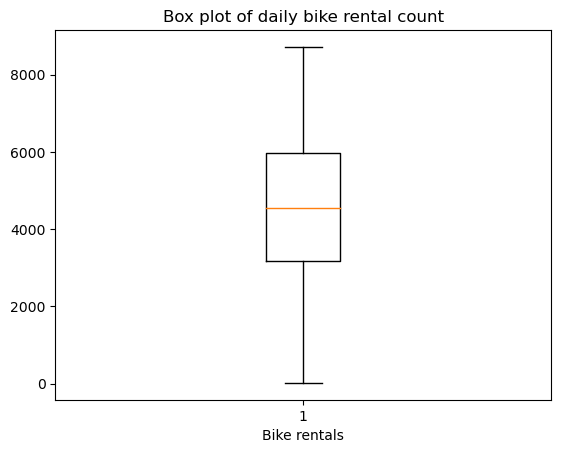

In [37]:
## Creating a box plot of the "cnt" column
plt.boxplot(bike_dummy["cnt"])
plt.title("Box plot of daily bike rental count")
plt.xlabel("Bike rentals")
plt.show()

# Distribution Plots

<Axes: title={'center': 'Distplot for CNT'}, xlabel='cnt', ylabel='Density'>

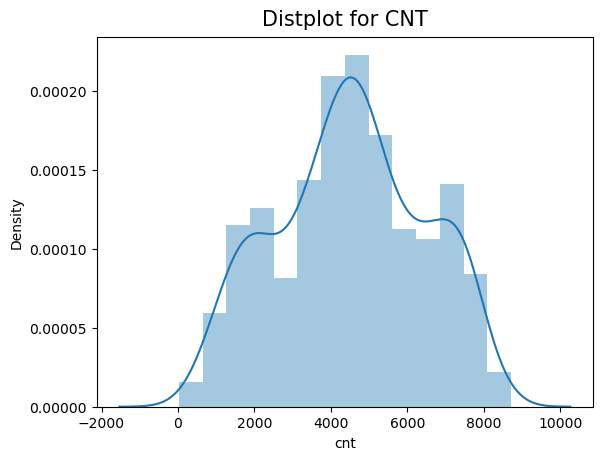

In [38]:
plt.title('Distplot for CNT', fontsize=15, y = 1.01)
sns.distplot(bike["cnt"])

<Axes: title={'center': 'Distplot for hum'}, xlabel='hum', ylabel='Density'>

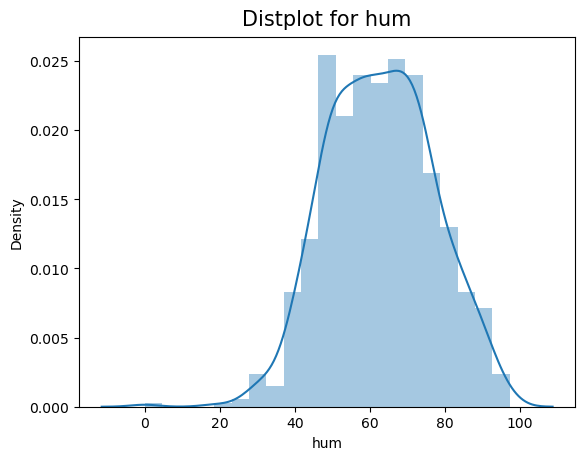

In [39]:
plt.title('Distplot for hum', fontsize=15, y = 1.01)
sns.distplot(bike["hum"])

<Axes: title={'center': 'Distplot for temp'}, xlabel='temp', ylabel='Density'>

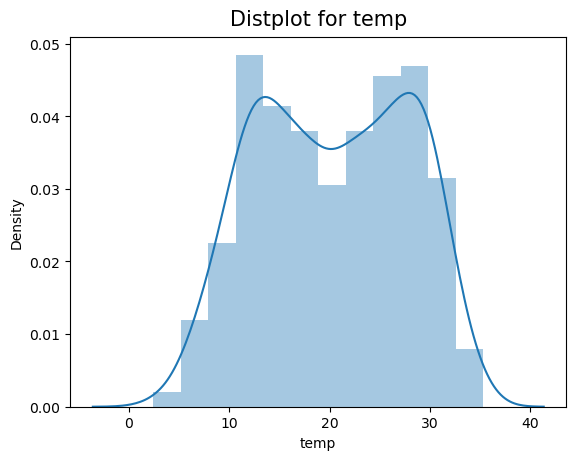

In [40]:
plt.title('Distplot for temp', fontsize=15, y = 1.01)
sns.distplot(bike["temp"])

<Axes: title={'center': 'Distplot for atemp'}, xlabel='atemp', ylabel='Density'>

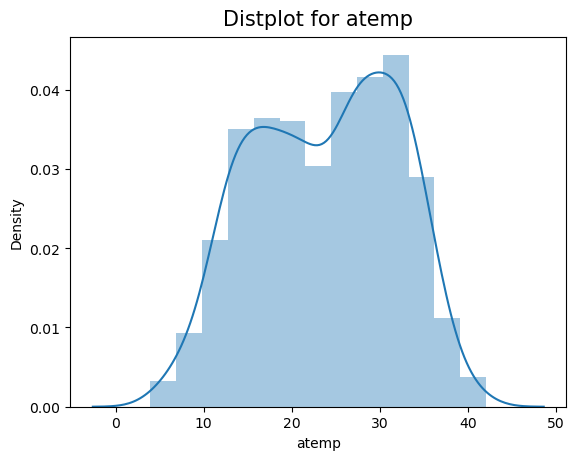

In [41]:
plt.title('Distplot for atemp', fontsize=15, y = 1.01)
sns.distplot(bike["atemp"])

<Axes: title={'center': 'Distplot for windspeed'}, xlabel='windspeed', ylabel='Density'>

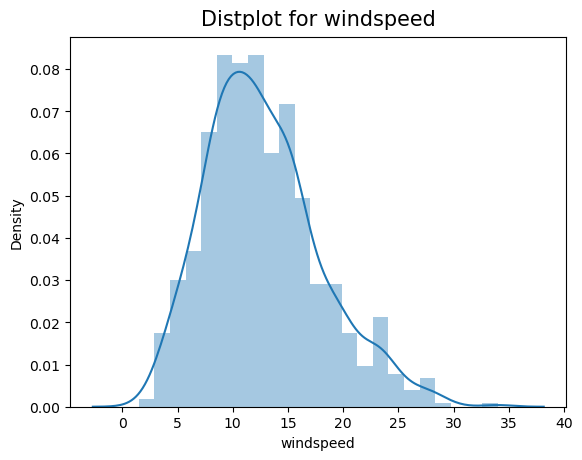

In [42]:
plt.title('Distplot for windspeed', fontsize=15, y = 1.01)
sns.distplot(bike["windspeed"])

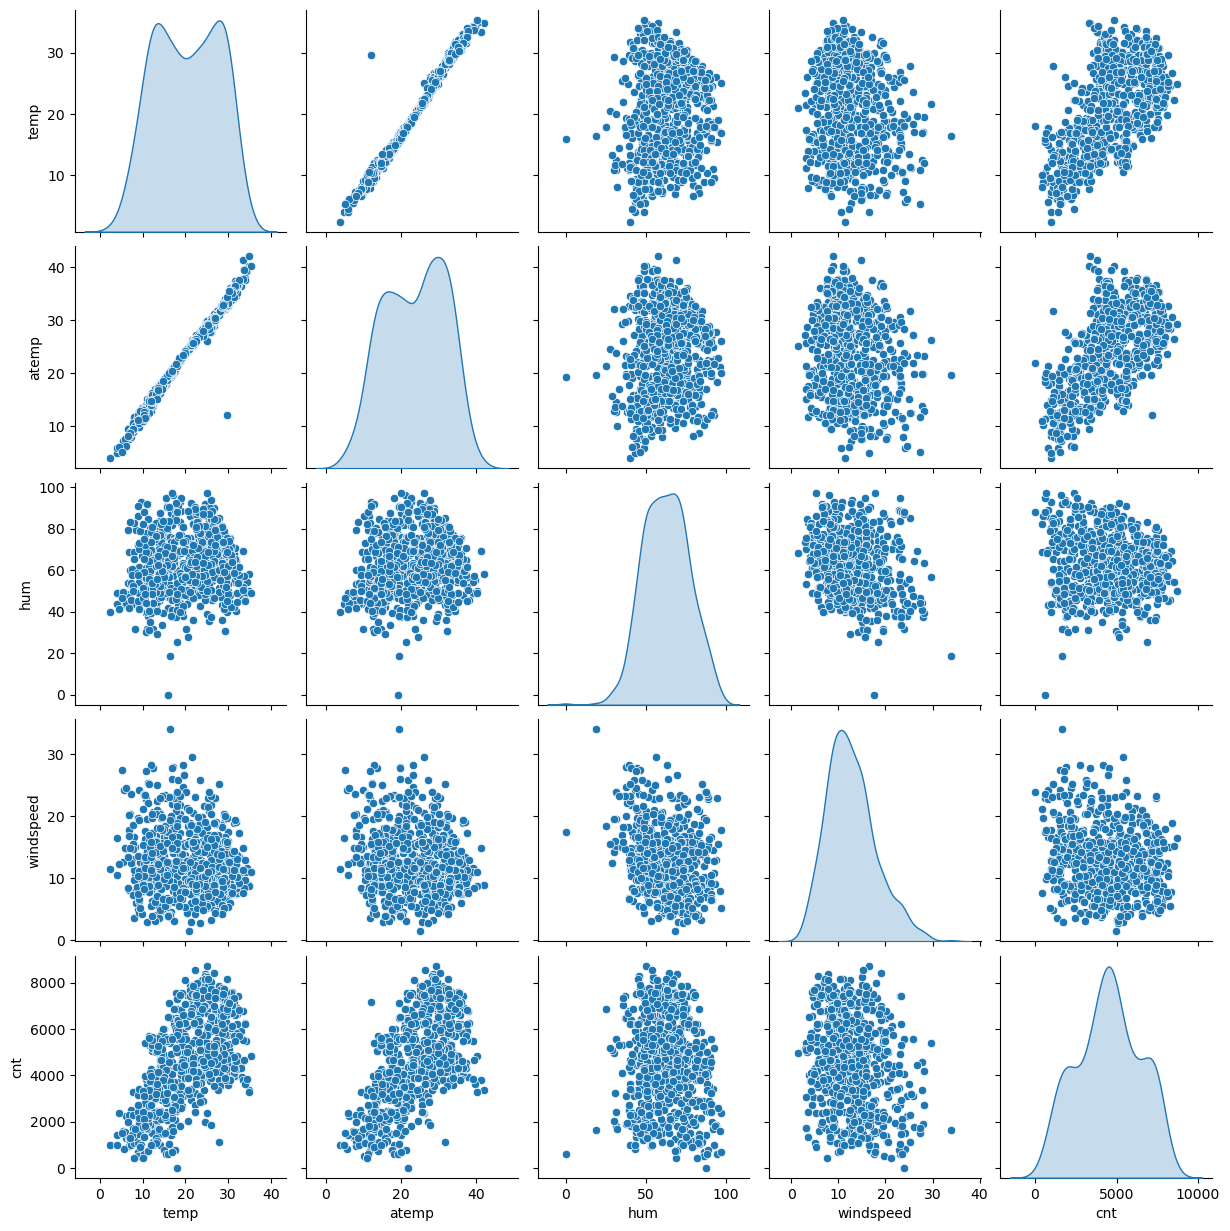

In [43]:
pairplot=bike_dummy[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(pairplot, diag_kind='kde')
plt.show()

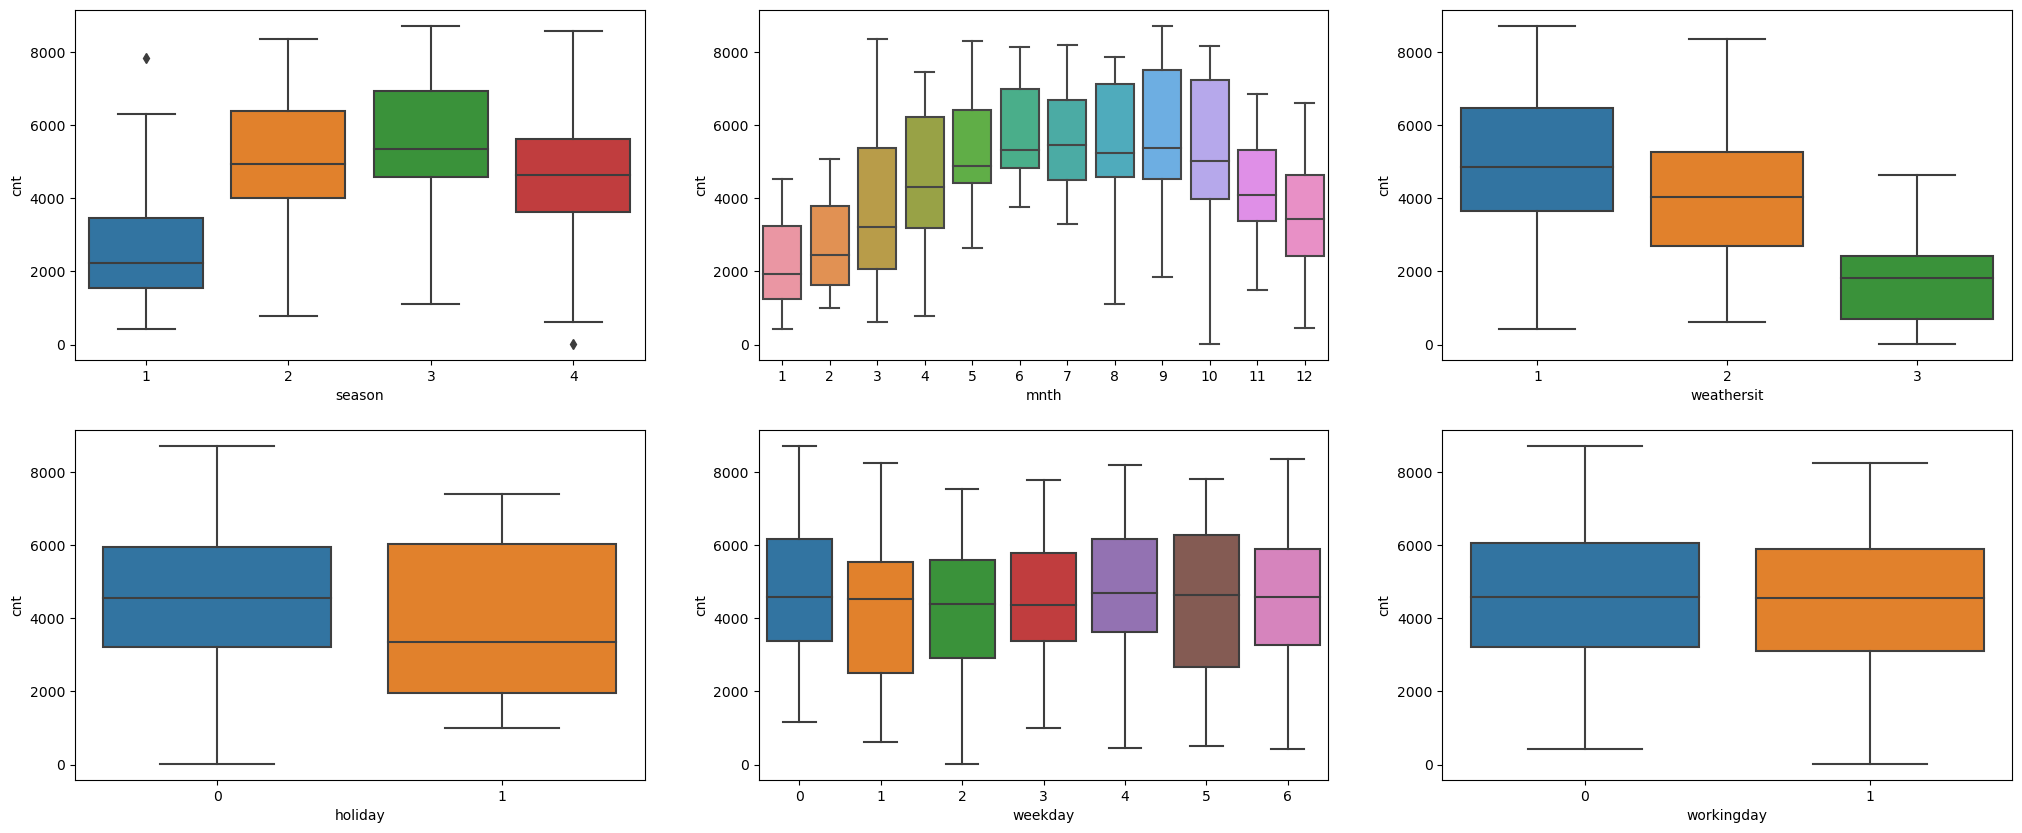

In [44]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

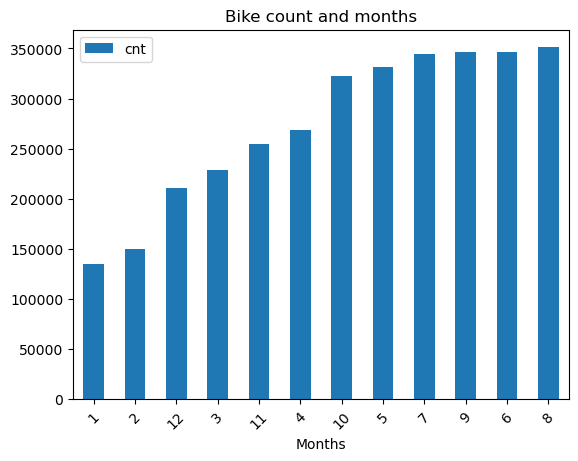

In [45]:
bike.groupby('mnth').sum().sort_values('cnt',ascending=True)[['cnt']].plot.bar()
plt.title('Bike count and months')
plt.xlabel('Months')
plt.xticks(rotation = 45)
plt.show()

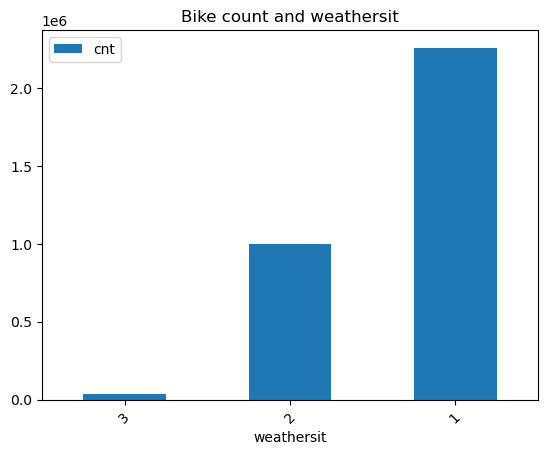

In [46]:
bike.groupby('weathersit').sum().sort_values('cnt',ascending=True)[['cnt']].plot.bar()
plt.title('Bike count and weathersit')
plt.xlabel('weathersit')
plt.xticks(rotation = 45)
plt.show()

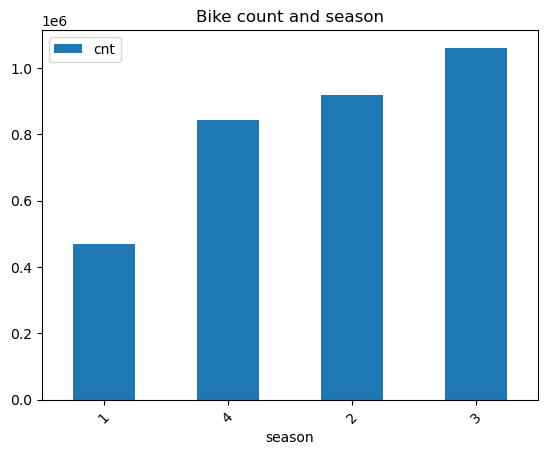

In [47]:
bike.groupby('season').sum().sort_values('cnt',ascending=True)[['cnt']].plot.bar()
plt.title('Bike count and season')
plt.xlabel('season')
plt.xticks(rotation = 45)
plt.show()

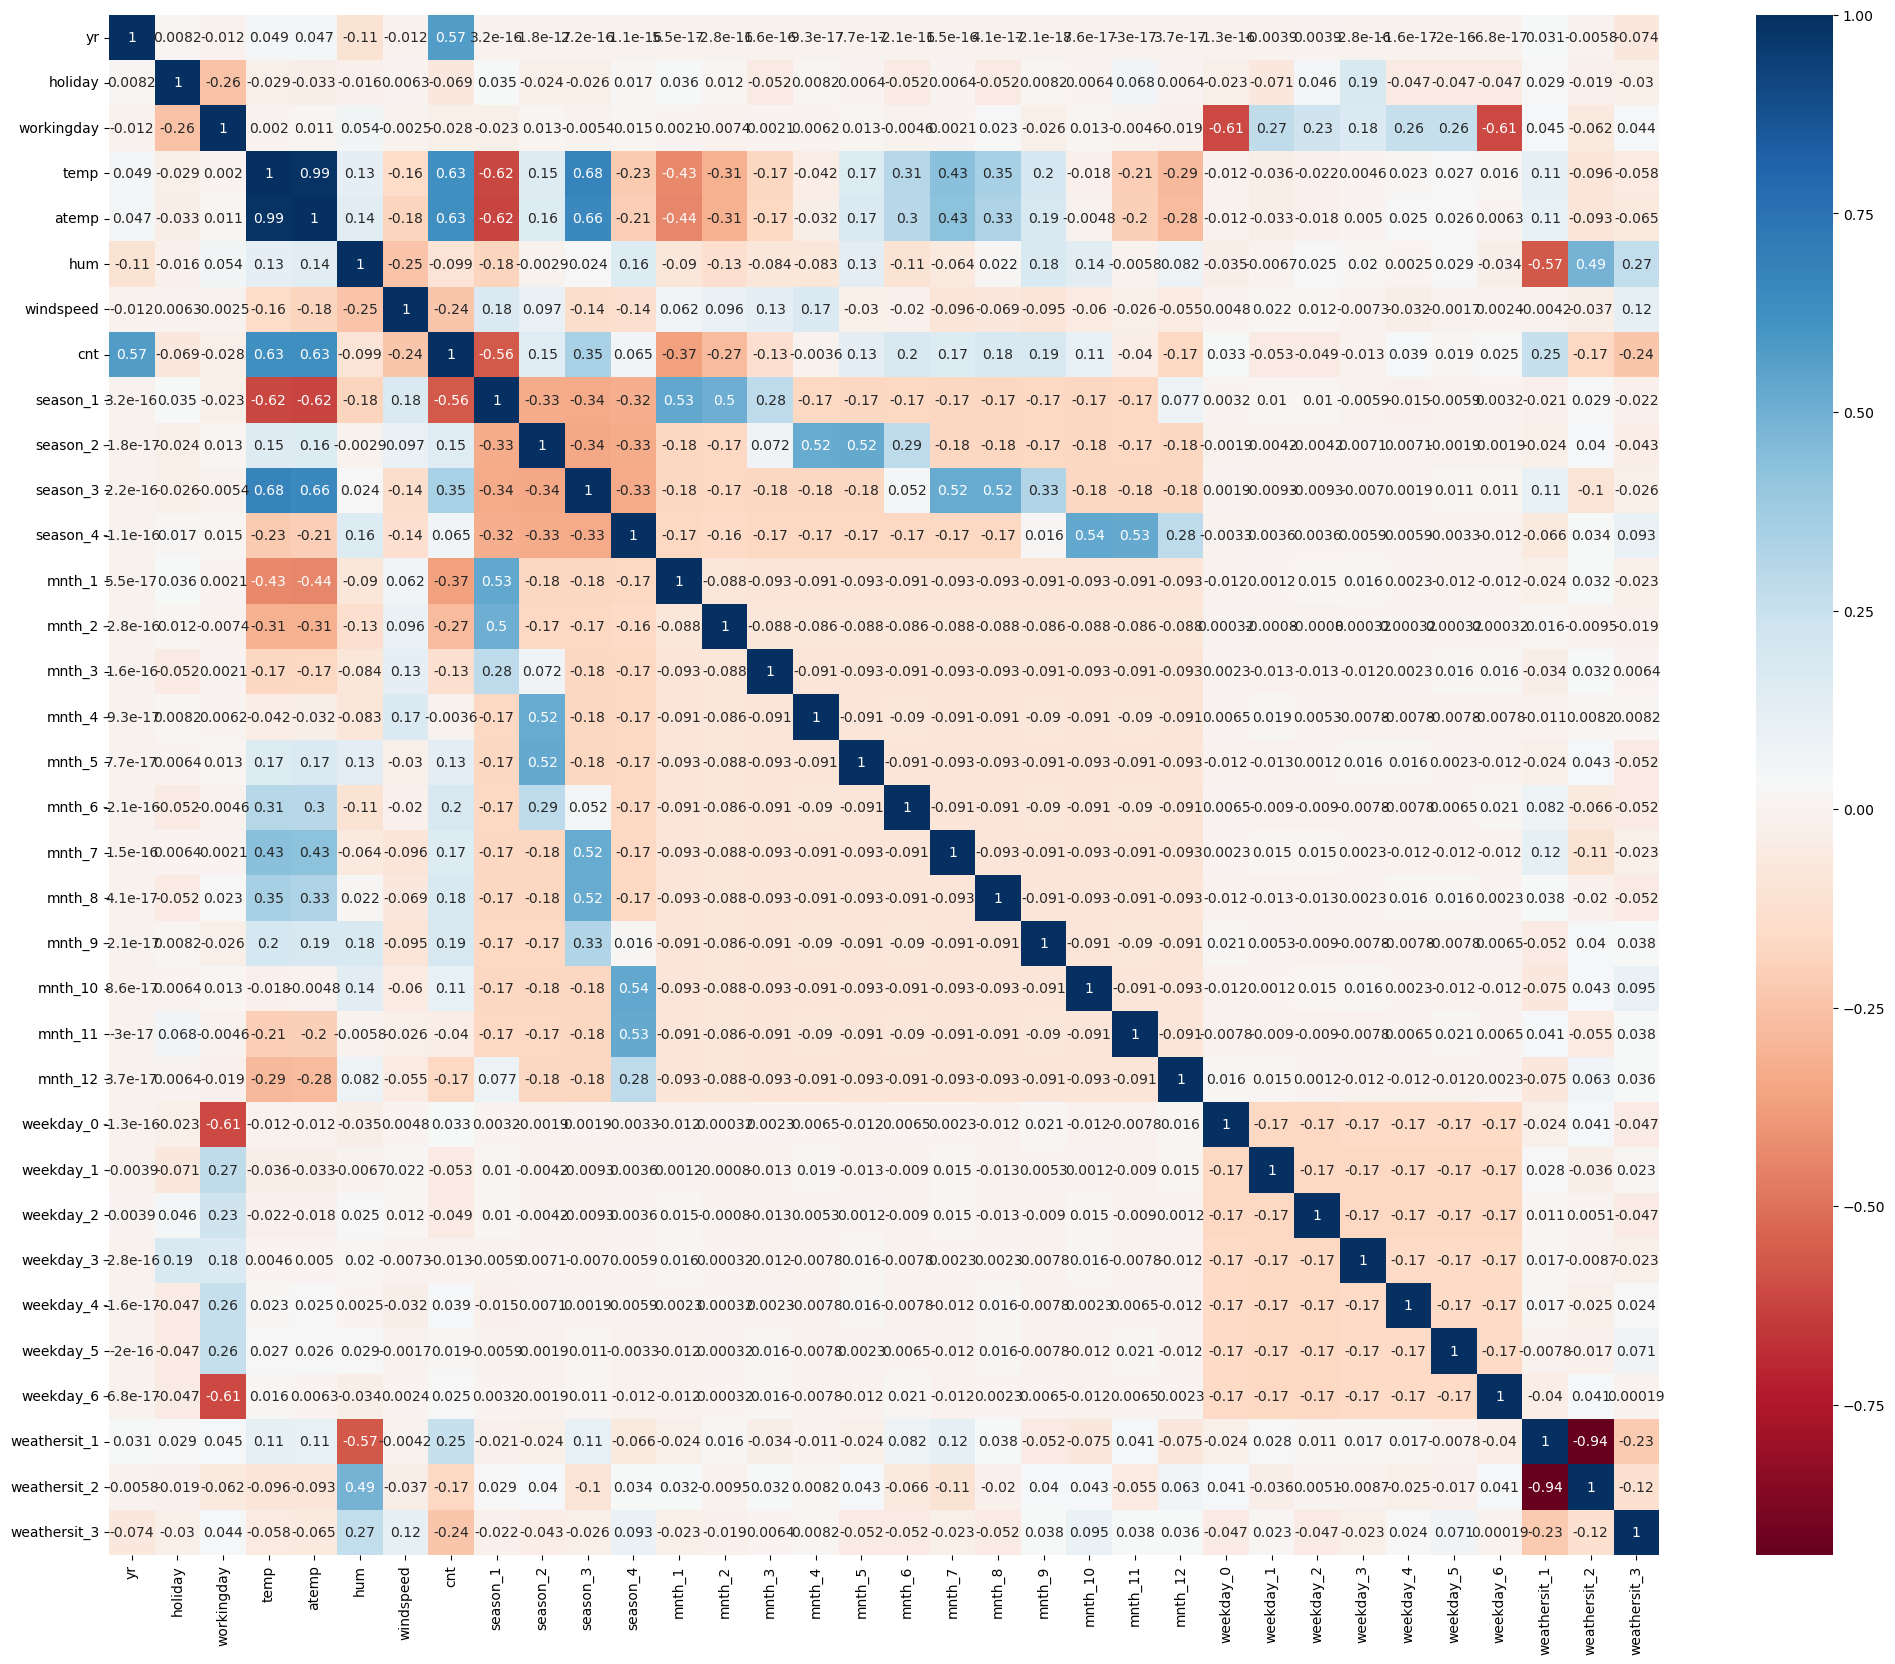

In [48]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_dummy.corr(), annot = True, cmap="RdBu")
plt.show()

## Spliting the data into train and test data sets 
- we will split the data into bike_train and bike_test(70:30 ratio) respectively

In [49]:
## split the data 
np.random.seed(0)
from sklearn.model_selection import train_test_split
bike_train,bike_test = train_test_split(bike_dummy, test_size = 0.3,train_size = 0.7, random_state=333)

In [50]:
print(bike_train.shape, bike_test.shape)

(510, 34) (219, 34)


In [51]:
bike_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

## Preprocessing the data 
- Standardisation 
- Normalisation

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [53]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,0,1,...,0,1,0,0,0,0,0,1,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,1,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,0,...,0,0,0,1,0,0,0,1,0,0
714,1,0,1,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,1,0,0,0,0,1,0,0


In [54]:
## Normalize the bike_train dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])
bike_train.head() 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
483,1,0,1,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,1,0,0,0,0,0,1,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,0,1,0,0,0,1,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,1,0,0,0,0,1,0,0


In [55]:
from statsmodels.graphics.regressionplots import influence_plot 
import statsmodels.formula.api as smf

In [56]:
bike_train.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
yr,1.000000,0.051135,-0.052606,0.058432,0.057054,-0.103383,0.020533,0.572532,-0.033998,-0.029524,...,0.015194,-0.029597,0.009229,0.004279,0.026744,-0.051456,0.026392,0.047742,-0.027637,-0.062839
holiday,0.051135,1.000000,-0.232763,-0.011078,-0.014366,-0.030756,0.009182,-0.000821,0.000352,-0.028934,...,-0.026508,-0.063445,0.077799,0.131099,-0.025059,-0.027931,-0.063445,0.037581,-0.029853,-0.025106
workingday,-0.052606,-0.232763,1.000000,0.021367,0.031486,0.046404,-0.000819,-0.065733,0.020589,-0.011934,...,-0.612856,0.272573,0.236172,0.196484,0.255930,0.264922,-0.612856,0.047894,-0.048698,0.000053
temp,0.058432,-0.011078,0.021367,1.000000,0.989610,0.173758,-0.161614,0.627185,-0.619600,0.139899,...,-0.042415,-0.063700,0.016378,0.021160,0.001482,0.052944,0.013866,0.080650,-0.071646,-0.031071
atemp,0.057054,-0.014366,0.031486,0.989610,1.000000,0.186440,-0.190693,0.630458,-0.623483,0.150771,...,-0.041033,-0.059105,0.020743,0.021243,0.003113,0.054570,0.000066,0.078814,-0.068360,-0.035341
hum,-0.103383,-0.030756,0.046404,0.173758,0.186440,1.000000,-0.281480,-0.059645,-0.218088,0.035514,...,-0.053309,0.020415,0.027309,0.002335,-0.024935,0.028323,-0.001420,-0.567124,0.499999,0.229950
windspeed,0.020533,0.009182,-0.000819,-0.161614,-0.190693,-0.281480,1.000000,-0.239927,0.183040,0.093057,...,0.001775,0.014391,0.016935,-0.010604,-0.062323,0.033592,0.004291,0.015789,-0.048791,0.098492
cnt,0.572532,-0.000821,-0.065733,0.627185,0.630458,-0.059645,-0.239927,1.000000,-0.563093,0.106378,...,0.033429,-0.087328,-0.030073,0.016949,0.028847,-0.010254,0.050313,0.232191,-0.156708,-0.238535
season_1,-0.033998,0.000352,0.020589,-0.619600,-0.623483,-0.218088,0.183040,-0.563093,1.000000,-0.329854,...,-0.002310,0.023584,-0.030530,-0.022608,0.056579,0.004142,-0.028204,0.005332,0.006413,-0.035594
season_2,-0.029524,-0.028934,-0.011934,0.139899,0.150771,0.035514,0.093057,0.106378,-0.329854,1.000000,...,-0.026421,-0.013439,0.009213,0.006017,-0.020240,-0.006796,0.051467,-0.054717,0.057647,-0.006108


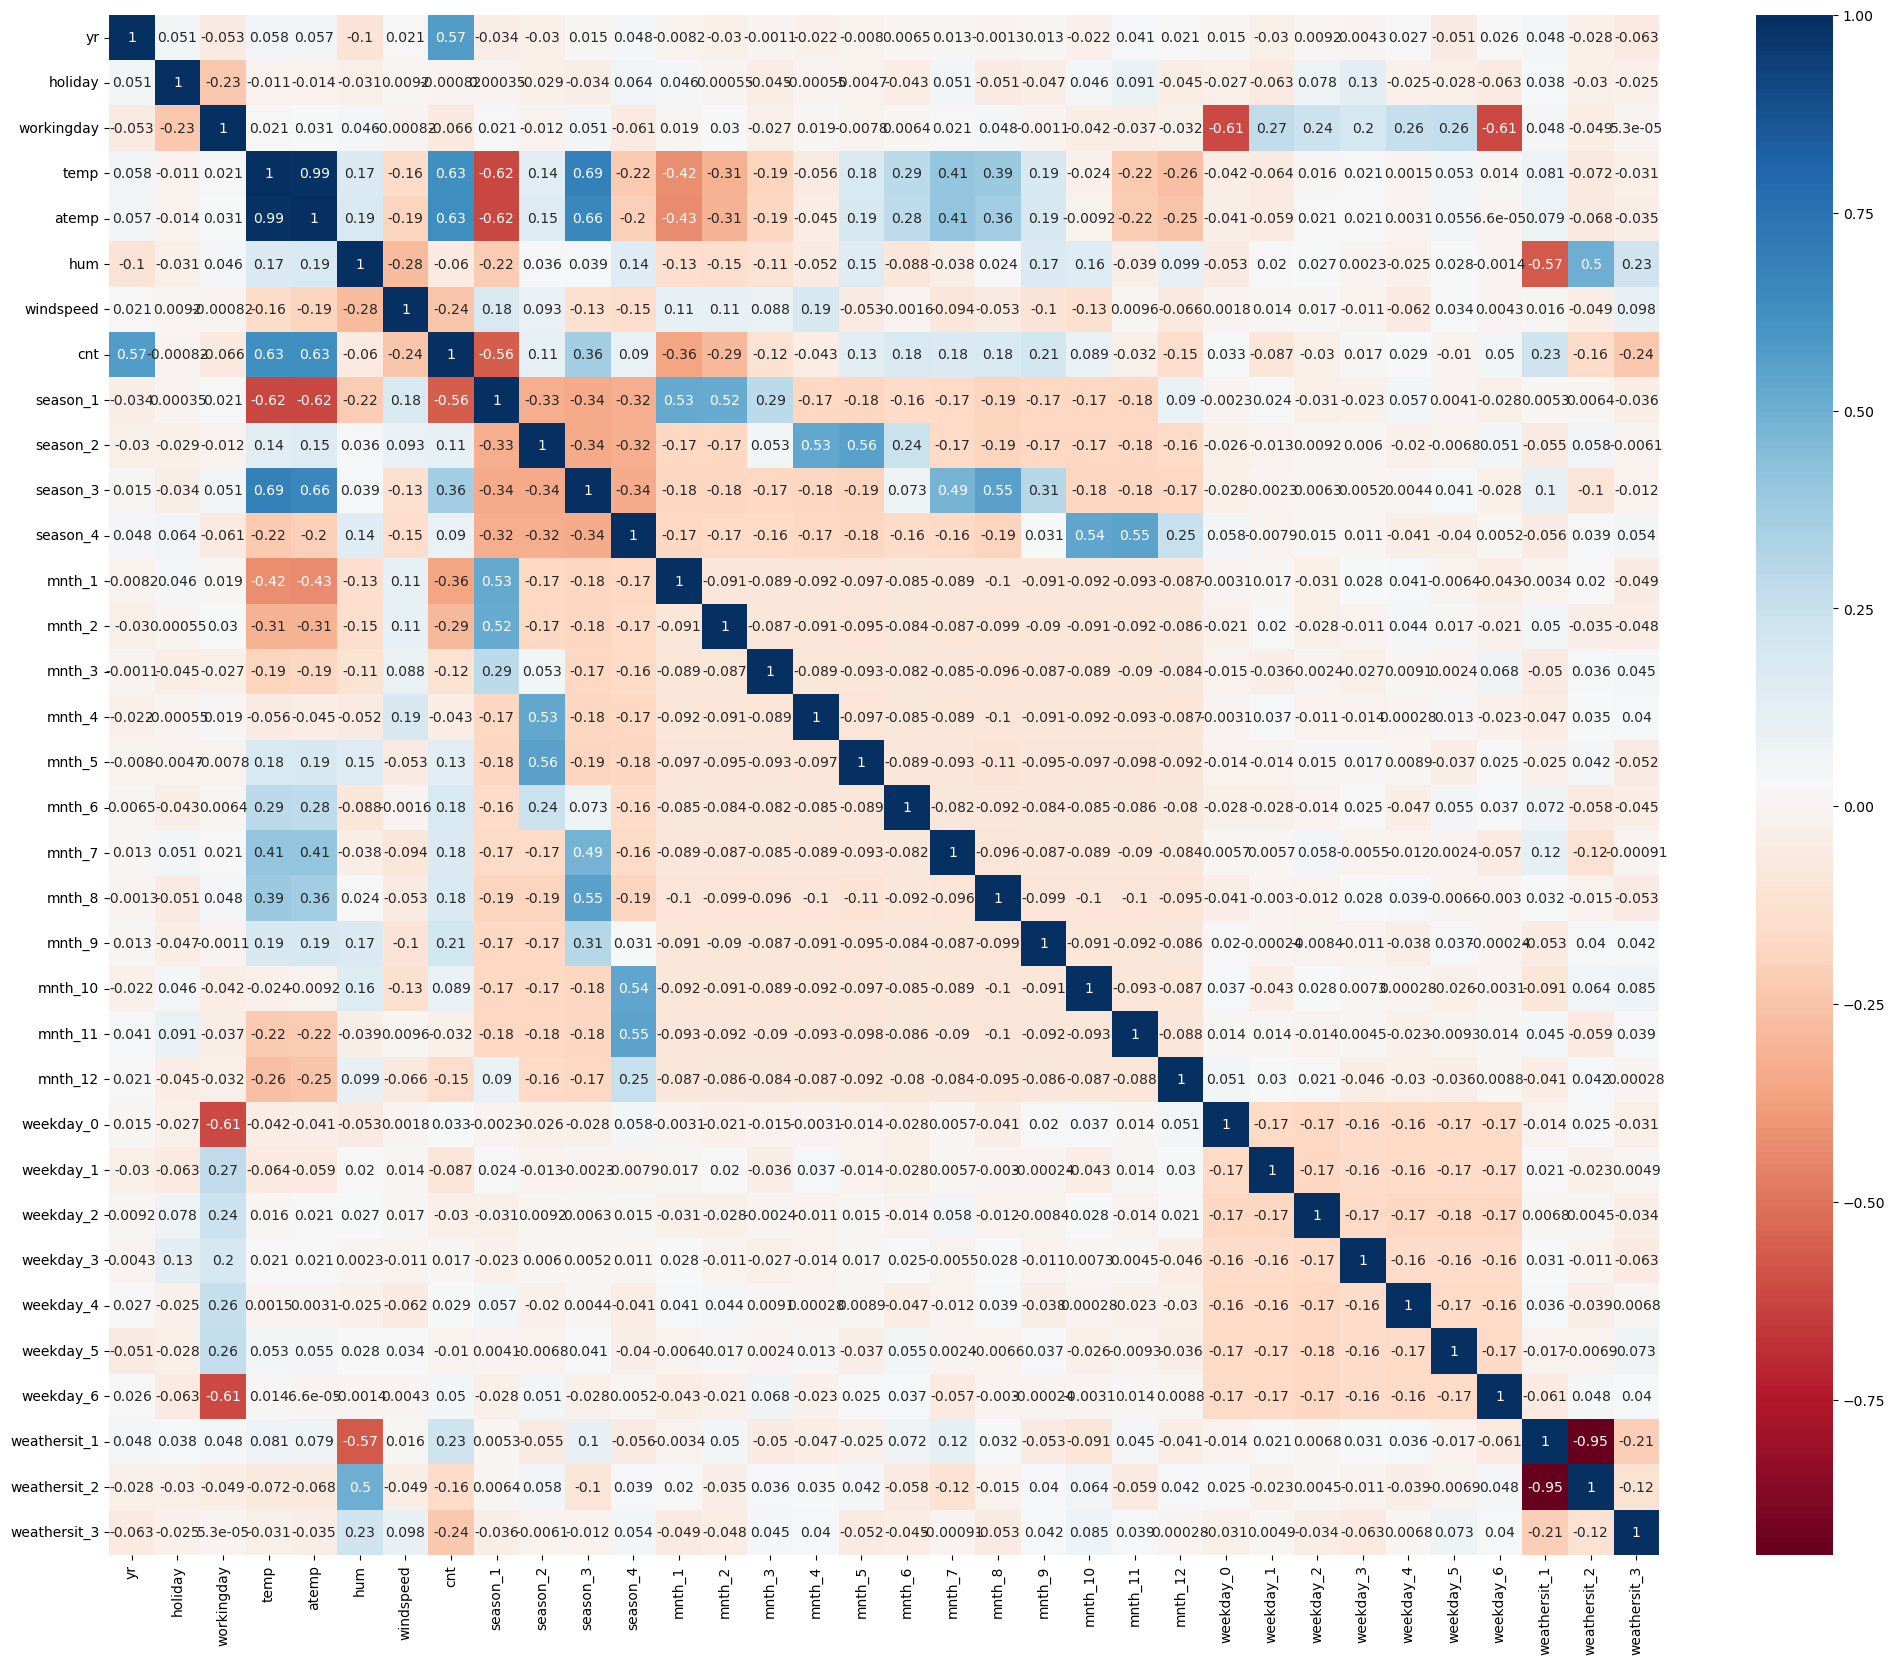

In [57]:
plt.figure(figsize = (25,20))
sns.heatmap(bike_train.corr(), annot = True, cmap="RdBu")
plt.show()

In [58]:
# split the bike_train dataset into x and y 
y_train = bike_train.pop('cnt')
x_train = bike_train

In [59]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [60]:
y_train

483    0.722734
650    0.815347
212    0.488265
714    0.433042
8      0.092039
         ...   
467    0.733548
444    0.714220
46     0.240796
374    0.411413
366    0.221928
Name: cnt, Length: 510, dtype: float64

# Model Building
- Linear Regression 
- Recursive Feature Elimination
- Random Forest Regression
- Decision Tree Regressor
- Support Vector Machine Regression
- Lasso Regression
- ElasticNet 
- Ridge Regression

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [63]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 16),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', False, 18),
 ('hum', False, 14),
 ('windspeed', False, 17),
 ('season_1', True, 1),
 ('season_2', False, 12),
 ('season_3', False, 13),
 ('season_4', True, 1),
 ('mnth_1', True, 1),
 ('mnth_2', True, 1),
 ('mnth_3', True, 1),
 ('mnth_4', False, 11),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 4),
 ('mnth_8', False, 10),
 ('mnth_9', True, 1),
 ('mnth_10', False, 8),
 ('mnth_11', True, 1),
 ('mnth_12', True, 1),
 ('weekday_0', False, 6),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 3),
 ('weekday_4', False, 7),
 ('weekday_5', False, 9),
 ('weekday_6', False, 5),
 ('weathersit_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [64]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'season_1', 'season_4', 'mnth_1', 'mnth_2', 'mnth_3',
       'mnth_5', 'mnth_9', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [65]:
x_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'mnth_4', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10',
       'weekday_0', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [66]:
# Creating X_test dataframe with RFE selected variables
x_train_rfe = x_train[col]
x_train_rfe.head()

,yr,temp,season_1,season_4,mnth_1,mnth_2,mnth_3,mnth_5,mnth_9,mnth_11,mnth_12,weekday_1,weekday_2,weathersit_1,weathersit_2,weathersit_3
483,1,0.497426,0,0,0,0,0,0,0,0,0,1,0,1,0,0
650,1,0.416433,0,1,0,0,0,0,0,0,0,0,0,1,0,0
212,0,0.887856,0,0,0,0,0,0,0,0,0,0,0,1,0,0
714,1,0.378013,0,1,0,0,0,0,0,0,1,1,0,0,1,0
8,0,0.098690,1,0,1,0,0,0,0,0,0,0,1,1,0,0


In [67]:
# Check for the VIF(Variance Inflation Factor) values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,weathersit_1,24.79
14,weathersit_2,13.06
2,season_1,5.96
4,mnth_1,4.18
5,mnth_2,3.84
1,temp,3.36
6,mnth_3,2.37
3,season_4,2.27
10,mnth_12,1.97
9,mnth_11,1.86


In [69]:
import statsmodels.api as sm

# Add a constant
x_train_lm1 = sm.add_constant(x_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, x_train_lm1).fit()

In [70]:
# Check the parameters obtained

lr1.params

const           0.081056
yr              0.231954
temp            0.388207
season_1       -0.099337
season_4        0.090515
mnth_1         -0.056498
mnth_2         -0.034230
mnth_3          0.028965
mnth_5          0.032391
mnth_9          0.071351
mnth_11        -0.075903
mnth_12        -0.064062
weekday_1      -0.030531
weekday_2      -0.042520
weathersit_1    0.163164
weathersit_2    0.089033
weathersit_3   -0.171141
dtype: float64

In [71]:
# Print a summary of the linear regression model obtained
print(lr1.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     155.5
Date:                Sun, 14 May 2023   Prob (F-statistic):          4.66e-176
Time:                        11:13:34   Log-Likelihood:                 484.02
No. Observations:                 510   AIC:                            -936.0
Df Residuals:                     494   BIC:                            -868.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0811      0.020      4.092   

# Model 2
- Removing the variable mnth_2 and mnth_3 based on its High p-value & High VIF

In [72]:
x_train_new2 = x_train_rfe.drop(["mnth_2","mnth_3"], axis = 1)
x_train_new2

,yr,temp,season_1,season_4,mnth_1,mnth_5,mnth_9,mnth_11,mnth_12,weekday_1,weekday_2,weathersit_1,weathersit_2,weathersit_3
483,1,0.497426,0,0,0,0,0,0,0,1,0,1,0,0
650,1,0.416433,0,1,0,0,0,0,0,0,0,1,0,0
212,0,0.887856,0,0,0,0,0,0,0,0,0,1,0,0
714,1,0.378013,0,1,0,0,0,0,1,1,0,0,1,0
8,0,0.098690,1,0,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,0.477697,0,0,0,0,0,0,0,0,0,1,0,0
444,1,0.588804,0,0,0,0,0,0,0,0,0,0,1,0
46,0,0.322889,1,0,0,0,0,0,0,0,0,1,0,0
374,1,0.310971,1,0,1,0,0,0,0,0,0,1,0,0


In [73]:
x_train_new2.columns

Index(['yr', 'temp', 'season_1', 'season_4', 'mnth_1', 'mnth_5', 'mnth_9',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

# VIF check 

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_new2.columns
vif['VIF'] = [variance_inflation_factor(x_train_new2.values, i) for i in range(x_train_new2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weathersit_1,20.29
12,weathersit_2,10.72
2,season_1,2.97
1,temp,2.83
3,season_4,2.25
7,mnth_11,1.71
13,weathersit_3,1.64
4,mnth_1,1.50
8,mnth_12,1.32
5,mnth_5,1.14


In [75]:
# Add a constant
x_train_lm2 = sm.add_constant(x_train_new2)

# Create a first fitted model
lr2 = sm.OLS(y_train, x_train_lm2).fit()
lr2

In [76]:
# Check the parameters obtained

lr2.params

const           0.084078
yr              0.232434
temp            0.387656
season_1       -0.109971
season_4        0.087144
mnth_1         -0.047976
mnth_5          0.030409
mnth_9          0.070076
mnth_11        -0.074681
mnth_12        -0.060189
weekday_1      -0.031729
weekday_2      -0.042117
weathersit_1    0.161695
weathersit_2    0.089167
weathersit_3   -0.166784
dtype: float64

In [77]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     176.5
Date:                Sun, 14 May 2023   Prob (F-statistic):          1.62e-176
Time:                        11:13:34   Log-Likelihood:                 479.74
No. Observations:                 510   AIC:                            -931.5
Df Residuals:                     496   BIC:                            -872.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.018      4.620   

# Model 3
- Removing the variable mnth_5 based on its High p-value & High VIF

In [78]:
x_train_new3 = x_train_new2.drop(["mnth_5"], axis = 1)
x_train_new3

,yr,temp,season_1,season_4,mnth_1,mnth_9,mnth_11,mnth_12,weekday_1,weekday_2,weathersit_1,weathersit_2,weathersit_3
483,1,0.497426,0,0,0,0,0,0,1,0,1,0,0
650,1,0.416433,0,1,0,0,0,0,0,0,1,0,0
212,0,0.887856,0,0,0,0,0,0,0,0,1,0,0
714,1,0.378013,0,1,0,0,0,1,1,0,0,1,0
8,0,0.098690,1,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,0.477697,0,0,0,0,0,0,0,0,1,0,0
444,1,0.588804,0,0,0,0,0,0,0,0,0,1,0
46,0,0.322889,1,0,0,0,0,0,0,0,1,0,0
374,1,0.310971,1,0,1,0,0,0,0,0,1,0,0


In [79]:
x_train_new3.columns

Index(['yr', 'temp', 'season_1', 'season_4', 'mnth_1', 'mnth_9', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

# VIF check

In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_new3.columns
vif['VIF'] = [variance_inflation_factor(x_train_new3.values, i) for i in range(x_train_new3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,weathersit_1,19.60
11,weathersit_2,10.26
2,season_1,2.82
1,temp,2.81
3,season_4,2.16
6,mnth_11,1.71
12,weathersit_3,1.63
4,mnth_1,1.50
7,mnth_12,1.32
5,mnth_9,1.07


In [81]:
# Add a constant
x_train_lm3 = sm.add_constant(x_train_new3)

# Create a first fitted model
lr3 = sm.OLS(y_train, x_train_lm3).fit()
# Check the parameters obtained

lr3.params

const           0.090194
yr              0.232473
temp            0.383630
season_1       -0.117272
season_4        0.081210
mnth_1         -0.048689
mnth_9          0.065688
mnth_11        -0.075952
mnth_12        -0.061287
weekday_1      -0.031989
weekday_2      -0.041987
weathersit_1    0.164170
weathersit_2    0.092544
weathersit_3   -0.166520
dtype: float64

In [82]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     189.9
Date:                Sun, 14 May 2023   Prob (F-statistic):          7.44e-177
Time:                        11:13:35   Log-Likelihood:                 477.82
No. Observations:                 510   AIC:                            -929.6
Df Residuals:                     497   BIC:                            -874.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0902      0.018      5.018   

# Model 4
- Removing the variable mnth_1 based on its High p-value & High VIF

In [83]:
x_train_new4 = x_train_new3.drop(["mnth_1"], axis = 1)
x_train_new4

,yr,temp,season_1,season_4,mnth_9,mnth_11,mnth_12,weekday_1,weekday_2,weathersit_1,weathersit_2,weathersit_3
483,1,0.497426,0,0,0,0,0,1,0,1,0,0
650,1,0.416433,0,1,0,0,0,0,0,1,0,0
212,0,0.887856,0,0,0,0,0,0,0,1,0,0
714,1,0.378013,0,1,0,0,1,1,0,0,1,0
8,0,0.098690,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
467,1,0.477697,0,0,0,0,0,0,0,1,0,0
444,1,0.588804,0,0,0,0,0,0,0,0,1,0
46,0,0.322889,1,0,0,0,0,0,0,1,0,0
374,1,0.310971,1,0,0,0,0,0,0,1,0,0


In [84]:
x_train_new4.columns

Index(['yr', 'temp', 'season_1', 'season_4', 'mnth_9', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

# VIF 

In [85]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_new4.columns
vif['VIF'] = [variance_inflation_factor(x_train_new4.values, i) for i in range(x_train_new4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,weathersit_1,18.80
10,weathersit_2,9.84
1,temp,2.68
2,season_1,2.65
3,season_4,2.16
5,mnth_11,1.69
11,weathersit_3,1.61
6,mnth_12,1.26
4,mnth_9,1.07
7,weekday_1,1.04


In [86]:
# Add a constant
x_train_lm4 = sm.add_constant(x_train_new4)

# Create a first fitted model
lr4 = sm.OLS(y_train, x_train_lm4).fit()
# Check the parameters obtained

lr4.params

const           0.081820
yr              0.231730
temp            0.401397
season_1       -0.127704
season_4        0.081800
mnth_9          0.065731
mnth_11        -0.070708
mnth_12        -0.051076
weekday_1      -0.031824
weekday_2      -0.041416
weathersit_1    0.160171
weathersit_2    0.088689
weathersit_3   -0.167040
dtype: float64

In [87]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.2
Date:                Sun, 14 May 2023   Prob (F-statistic):          1.42e-176
Time:                        11:13:35   Log-Likelihood:                 474.39
No. Observations:                 510   AIC:                            -924.8
Df Residuals:                     498   BIC:                            -874.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0818      0.018      4.601   

# Model 5
- Removing the variable weekday_1 based on its High p-value & High VIF

In [88]:
x_train_new5 = x_train_new4.drop(["weekday_1"], axis = 1)
x_train_new5

,yr,temp,season_1,season_4,mnth_9,mnth_11,mnth_12,weekday_2,weathersit_1,weathersit_2,weathersit_3
483,1,0.497426,0,0,0,0,0,0,1,0,0
650,1,0.416433,0,1,0,0,0,0,1,0,0
212,0,0.887856,0,0,0,0,0,0,1,0,0
714,1,0.378013,0,1,0,0,1,0,0,1,0
8,0,0.098690,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
467,1,0.477697,0,0,0,0,0,0,1,0,0
444,1,0.588804,0,0,0,0,0,0,0,1,0
46,0,0.322889,1,0,0,0,0,0,1,0,0
374,1,0.310971,1,0,0,0,0,0,1,0,0


In [89]:
x_train_new5.columns

Index(['yr', 'temp', 'season_1', 'season_4', 'mnth_9', 'mnth_11', 'mnth_12',
       'weekday_2', 'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# VIF 

In [90]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_new5.columns
vif['VIF'] = [variance_inflation_factor(x_train_new5.values, i) for i in range(x_train_new5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,weathersit_1,18.31
9,weathersit_2,9.62
1,temp,2.66
2,season_1,2.65
3,season_4,2.15
5,mnth_11,1.69
10,weathersit_3,1.59
6,mnth_12,1.26
4,mnth_9,1.07
0,yr,1.02


In [91]:
# Add a constant
x_train_lm5 = sm.add_constant(x_train_new5)

# Create a first fitted model
lr5 = sm.OLS(y_train, x_train_lm5).fit()
# Check the parameters obtained

lr5.params

const           0.074964
yr              0.232252
temp            0.406972
season_1       -0.125826
season_4        0.083564
mnth_9          0.065092
mnth_11        -0.071257
mnth_12        -0.052405
weekday_2      -0.036049
weathersit_1    0.157428
weathersit_2    0.086643
weathersit_3   -0.169107
dtype: float64

In [92]:
# Print a summary of the linear regression model obtained
print(lr5.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     221.5
Date:                Sun, 14 May 2023   Prob (F-statistic):          2.35e-176
Time:                        11:13:35   Log-Likelihood:                 471.07
No. Observations:                 510   AIC:                            -920.1
Df Residuals:                     499   BIC:                            -873.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0750      0.018      4.241   

# ASSUMPTIONS
- Linearity
- Independence
- Homoscedasticity
- Normality
- Influential Outliers

In [93]:
y_train_pred = lr5.predict(x_train_lm5)
y_train_pred 

483    0.667082
650    0.717684
212    0.593723
714    0.578859
8      0.110680
         ...   
467    0.659053
444    0.633486
46     0.237972
374    0.465374
366    0.447294
Length: 510, dtype: float64

In [94]:
res = y_train-y_train_pred
res

483    0.055651
650    0.097664
212   -0.105458
714   -0.145817
8     -0.018642
         ...   
467    0.074495
444    0.080734
46     0.002824
374   -0.053961
366   -0.225366
Length: 510, dtype: float64

# check for linearity

Text(0.5, 0, 'errors')

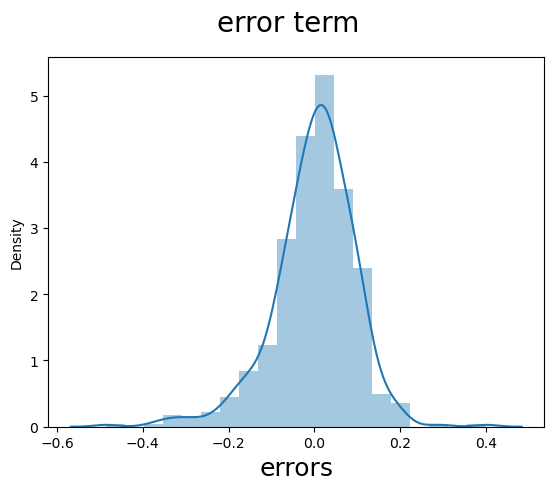

In [95]:
fig = plt.figure()
sns.distplot(res,bins=20)
fig.suptitle('error term',fontsize = 20)
plt.xlabel('errors',fontsize= 18)

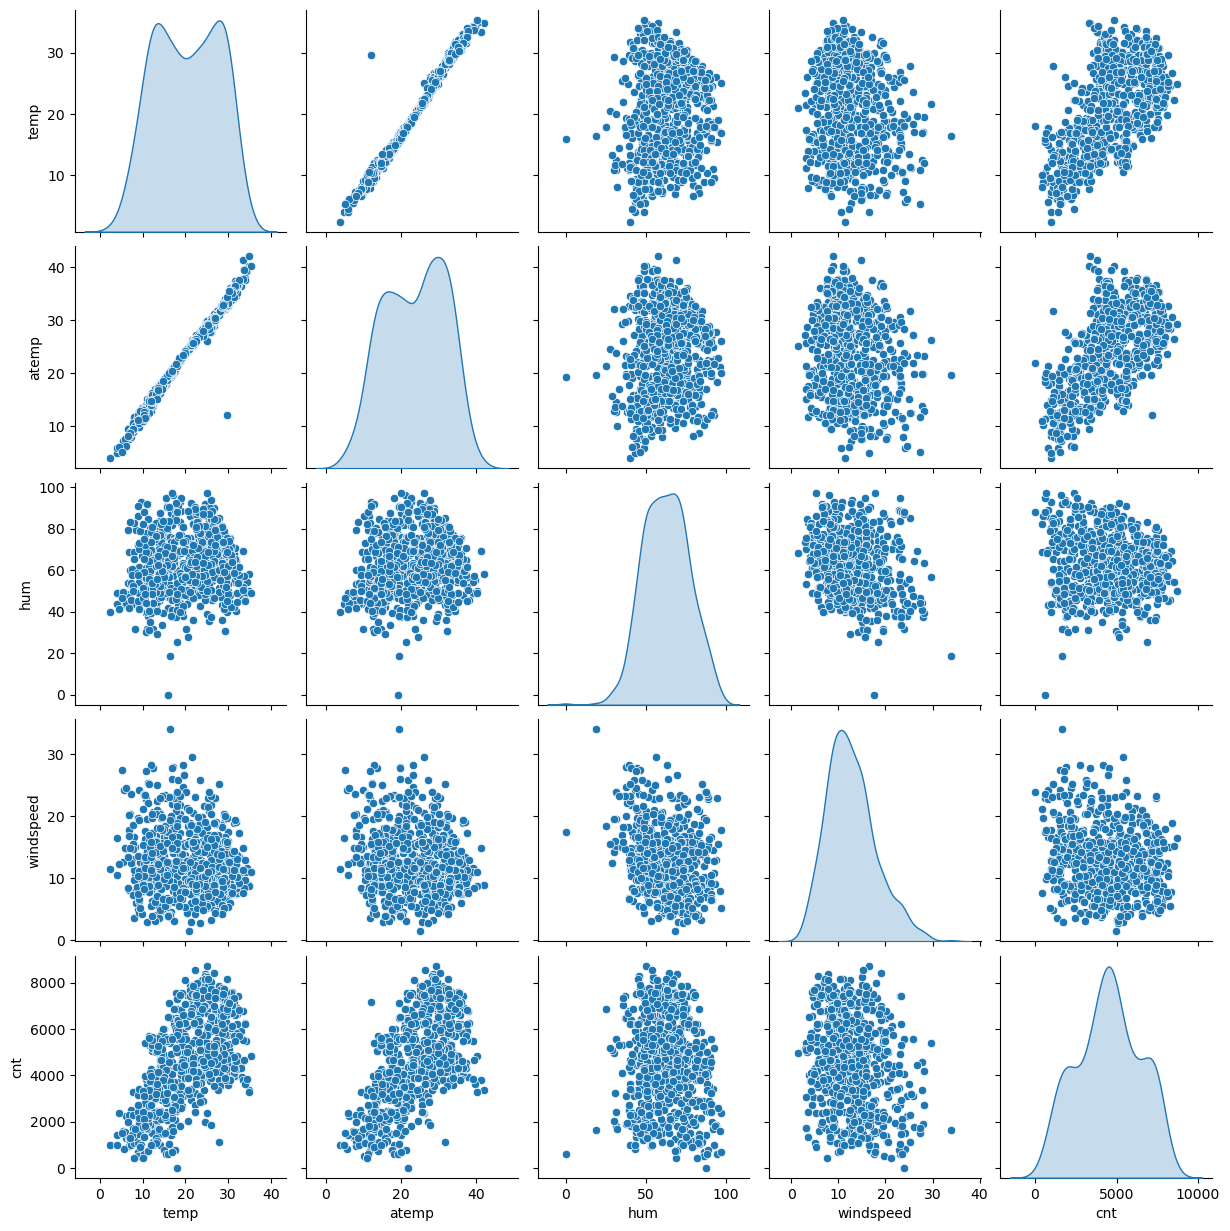

In [96]:
pairplot=bike_dummy[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(pairplot, diag_kind='kde')
plt.show()

## check for independence

In [97]:
dw_statistic = sm.stats.stattools.durbin_watson(lr5.resid)
print('Durbin-Watson statistic:', dw_statistic)

Durbin-Watson statistic: 2.0094317024726767


## check for homoscedasticity

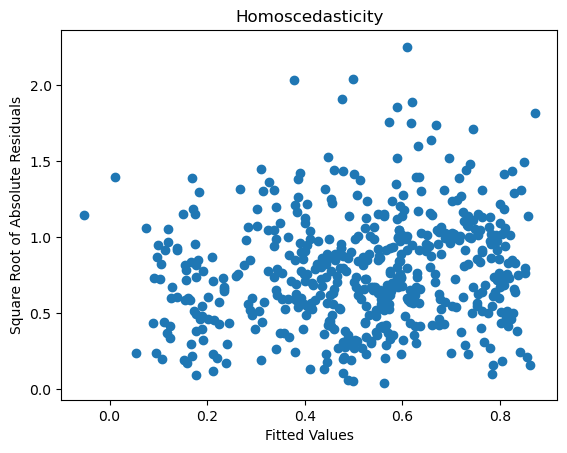

In [98]:
resid_std = lr5.get_influence().resid_studentized_internal
plt.scatter(lr5.fittedvalues, np.sqrt(np.abs(resid_std)))
plt.xlabel('Fitted Values')
plt.ylabel('Square Root of Absolute Residuals')
plt.title('Homoscedasticity')
plt.show() 

# check for normality

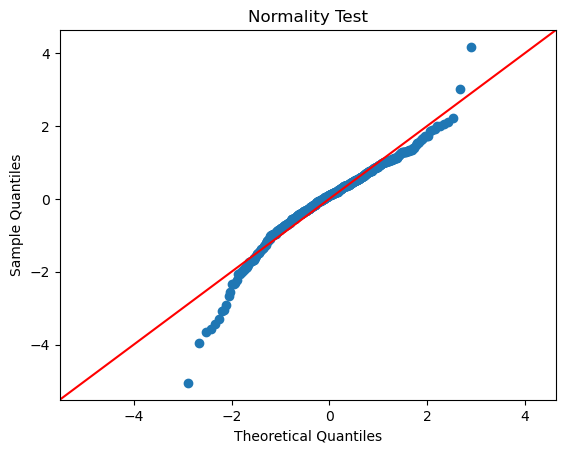

In [99]:
import statsmodels.graphics.gofplots as smg
resids = lr5.resid
fig = smg.qqplot(resids, line='45', fit=True)
plt.title('Normality Test')
plt.show()

## check for influential outliers

In [100]:
infl = lr5.get_influence()
summ_df = infl.summary_frame()
print(summ_df[summ_df['hat_diag'] > 2 * x_train_lm5.shape[1] / x_train_lm5.shape[0]])

     dfb_const    dfb_yr  dfb_temp  dfb_season_1  dfb_season_4  dfb_mnth_9  \
355  -0.137974 -0.100714  0.176176      0.182528     -0.060884    0.017476   
89    0.467439 -0.029700 -0.247903     -0.232110     -0.155285   -0.040209   
249  -0.022275  0.005584  0.000790      0.001958      0.009119   -0.027570   
729  -0.007689  0.025473 -0.000241      0.016905     -0.038021    0.009353   
68    0.083766 -0.037651  0.069250      0.122121      0.026964   -0.023402   
358   0.010602  0.022965 -0.009779     -0.021411      0.023585   -0.009212   
354  -0.102896 -0.073542  0.131052      0.134939     -0.043251    0.012483   
325   0.063840 -0.033791  0.038982      0.030122      0.007509   -0.012958   
666  -0.388720 -0.268316  0.019171     -0.027554     -0.423271    0.179880   
267  -0.005715 -0.004631  0.005138      0.005689      0.009711    0.011388   
319   0.053217 -0.036819  0.056571      0.043226      0.013686   -0.014881   
291   0.032549 -0.015142  0.020755      0.018051      0.055572  

## Split the boke_test dataset into x and y

In [101]:
bike_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [102]:
## Normalize the bike_test dataset 
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])
bike_test.head() 

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
22,0,0,1,0.000000,0.000000,0.214684,0.517945,0.060844,1,0,...,0,0,1,0,0,0,0,1,0,0
468,1,0,0,0.529437,0.534900,0.311966,0.365150,0.881481,0,1,...,1,0,0,0,0,0,0,1,0,0
553,1,0,1,0.964569,0.950552,0.415751,0.185998,0.528077,0,0,...,0,1,0,0,0,0,0,1,0,0
504,1,0,1,0.696625,0.666813,0.352259,0.539258,0.839523,0,1,...,0,1,0,0,0,0,0,1,0,0
353,0,0,1,0.384393,0.409075,0.447497,0.010221,0.411205,0,0,...,0,0,0,0,1,0,0,0,1,0


In [103]:
## Dividing the test data set into x_test and y_test
x_test = bike_test.drop('cnt',axis = 1)
y_test = bike_test["cnt"]

In [104]:
y_test

22     0.060844
468    0.881481
553    0.528077
504    0.839523
353    0.411205
         ...   
237    0.526683
611    0.805932
258    0.539232
518    0.904424
313    0.307644
Name: cnt, Length: 219, dtype: float64

In [105]:
x_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [106]:
## Predections 
y_pred1 = lm.predict(x_test)
y_pred1

array([ 0.03955078,  0.69042969,  0.88183594,  0.78857422,  0.44140625,
        0.21777344,  0.31396484,  0.84423828, -0.08789062,  0.33105469,
        0.41943359,  0.49316406,  0.54638672,  0.35839844,  0.88818359,
        0.51953125,  0.58886719,  0.11962891,  0.57373047,  0.43212891,
        0.21337891,  0.52880859,  0.45800781,  0.53955078,  0.22509766,
        0.31298828,  0.35546875,  0.56054688,  0.29736328,  0.35693359,
        0.55322266,  0.51708984,  0.47558594,  0.30615234,  0.66064453,
        0.46435547,  0.54052734,  0.54052734,  0.86523438,  0.88232422,
        0.66748047,  0.54003906,  0.44091797,  0.85400391,  0.81103516,
        0.33837891,  0.56689453,  0.72949219,  0.64160156,  0.46630859,
        0.76904297,  0.36767578,  0.51367188,  0.32470703,  0.72900391,
        0.17431641,  0.89306641,  0.30566406,  0.60302734,  0.49121094,
        0.78222656,  0.83496094,  0.12890625,  0.44335938,  0.31054688,
        0.50244141,  0.59423828,  0.22167969,  0.81494141,  0.29

# Model Evaluation

<Figure size 640x480 with 0 Axes>

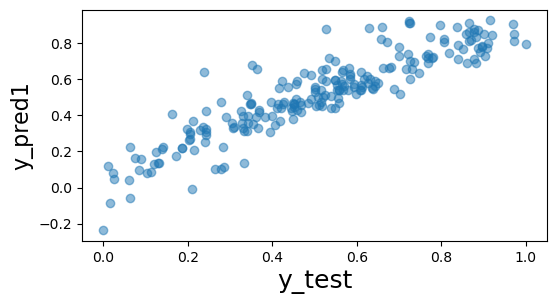

In [107]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.figure(figsize = (6,3))
plt.scatter(y_test, y_pred1, alpha=.5)
fig.suptitle('y_test vs y_pred1', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_pred1', fontsize = 16) 
plt.show()

In [108]:
r2_score(y_test, y_pred1)

0.8182719059743137

# Random Forest Regressor Model 

In [109]:
## fitting a random forest regressor model 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [110]:
rfr.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=1608637542),
 DecisionTreeRegressor(max_features=1.0, random_state=1273642419),
 DecisionTreeRegressor(max_features=1.0, random_state=1935803228),
 DecisionTreeRegressor(max_features=1.0, random_state=787846414),
 DecisionTreeRegressor(max_features=1.0, random_state=996406378),
 DecisionTreeRegressor(max_features=1.0, random_state=1201263687),
 DecisionTreeRegressor(max_features=1.0, random_state=423734972),
 DecisionTreeRegressor(max_features=1.0, random_state=415968276),
 DecisionTreeRegressor(max_features=1.0, random_state=670094950),
 DecisionTreeRegressor(max_features=1.0, random_state=1914837113),
 DecisionTreeRegressor(max_features=1.0, random_state=669991378),
 DecisionTreeRegressor(max_features=1.0, random_state=429389014),
 DecisionTreeRegressor(max_features=1.0, random_state=249467210),
 DecisionTreeRegressor(max_features=1.0, random_state=1972458954),
 DecisionTreeRegressor(max_features=1.0, random_state=1572714583),
 De

In [111]:
rfr.n_features_in_

33

In [112]:
rfr.n_outputs_

1

In [113]:
# Using KFold and Cross validation score 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [114]:
kfold = KFold(n_splits=10, random_state=42,shuffle = True)
kfold

KFold(n_splits=10, random_state=42, shuffle=True)

In [115]:
results = cross_val_score(rfr, x_train, y_train, cv=kfold)
results

array([0.82528429, 0.82447822, 0.84642567, 0.8496819 , 0.814511  ,
       0.86288282, 0.93587464, 0.82505321, 0.80999585, 0.89150784])

In [116]:
print(results.mean()) 

0.8485695425223201


In [117]:
# Use the forest's predict method on the test data
predictions = rfr.predict(x_test)
errors = abs(predictions-y_test)
print("mean absolute error:",round(np.mean(errors),2),"degrees.")

mean absolute error: 0.06 degrees.


In [118]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
answer = 100 - np.mean(mape)
print('Answer:', round(answer, 2), '%.') 

Answer: -inf %.


In [119]:
# Predictions on train data
pred_train = rfr.predict(x_train)
pred_train

array([0.72021169, 0.76659572, 0.49998965, 0.45471123, 0.10919121,
       0.85494248, 0.79991141, 0.37658997, 0.17668201, 0.58279107,
       0.51371606, 0.33571905, 0.71974459, 0.49814542, 0.56351933,
       0.20062241, 0.23728946, 0.32791647, 0.44395421, 0.52835711,
       0.43459043, 0.81392775, 0.43748044, 0.83658306, 0.31347561,
       0.53470087, 0.7346468 , 0.79040612, 0.20921652, 0.18837897,
       0.15277497, 0.33127589, 0.57099632, 0.37787966, 0.44228371,
       0.6083226 , 0.54372066, 0.54495743, 0.18666245, 0.40968477,
       0.53575127, 0.17193856, 0.36961459, 0.21814312, 0.20464105,
       0.5314335 , 0.60270018, 0.27609411, 0.43922112, 0.42137598,
       0.63390359, 0.5364243 , 0.15456282, 0.61245283, 0.73919581,
       0.6270168 , 0.42142085, 0.34885412, 0.648211  , 0.48665785,
       0.3195191 , 0.76183272, 0.22388863, 0.33835021, 0.69280833,
       0.60077773, 0.27449954, 0.31173723, 0.14569719, 0.51397607,
       0.80277382, 0.76356305, 0.5863104 , 0.60545904, 0.60002

In [120]:
from sklearn.metrics import r2_score
print(r2_score(y_train,pred_train)) 

0.9805955716047052


In [121]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, pred_train)
print('Mean squared error: ', mse)

Mean squared error:  0.0009741642677088831


In [122]:
# Prediction on test data
pred_test = rfr.predict(x_test)
pred_test

array([0.11369995, 0.71934422, 0.67251726, 0.75047975, 0.37585941,
       0.19929821, 0.38042798, 0.8583318 , 0.28815578, 0.38075472,
       0.46341809, 0.45927289, 0.5865474 , 0.27682352, 0.83057639,
       0.60358721, 0.59351933, 0.19037506, 0.54552002, 0.44316958,
       0.13050046, 0.52282904, 0.49033134, 0.50080879, 0.35760815,
       0.37077543, 0.34806029, 0.48081914, 0.23883341, 0.24988035,
       0.57320295, 0.57076507, 0.34389439, 0.33994478, 0.74732973,
       0.49372411, 0.49576392, 0.58151634, 0.84361712, 0.62469972,
       0.79013   , 0.46396111, 0.48920732, 0.7947607 , 0.8815566 ,
       0.30512885, 0.53089047, 0.55763346, 0.43284169, 0.47023125,
       0.79216176, 0.32656811, 0.70278877, 0.41159572, 0.81569259,
       0.19544754, 0.72580189, 0.40538656, 0.33443281, 0.40908997,
       0.77012655, 0.77459733, 0.19238955, 0.40668086, 0.22598481,
       0.52610446, 0.57949724, 0.2286827 , 0.85876553, 0.18610792,
       0.69189024, 0.8254878 , 0.32493097, 0.41576162, 0.53775

In [123]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_test)) 

0.8689640732120671


In [124]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred_test)
print('Mean squared error: ', mse)

Mean squared error:  0.007660522798020597


In [125]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.08752441258312219


# Decission Tree Regressor

In [126]:
## fitting a decision tree regressor using absolute error criterian
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='absolute_error',max_depth=3)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=3)

In [127]:
dtr.feature_importances_

array([0.37295717, 0.        , 0.        , 0.07818712, 0.47250832,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07634739, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [128]:
dtr.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='absolute_error', max_depth=3)>

In [129]:
dtr.n_features_in_

33

In [130]:
y_pred2=dtr.predict(x_test)
y_pred2

array([0.18729867, 0.78255867, 0.78255867, 0.78255867, 0.31960423,
       0.36136677, 0.36136677, 0.78255867, 0.41319604, 0.41319604,
       0.51990336, 0.31960423, 0.51990336, 0.36136677, 0.78255867,
       0.52496549, 0.58858721, 0.31960423, 0.51990336, 0.51990336,
       0.18729867, 0.51990336, 0.51990336, 0.36136677, 0.41319604,
       0.41319604, 0.31960423, 0.78255867, 0.18729867, 0.36136677,
       0.51990336, 0.51990336, 0.31960423, 0.41319604, 0.78255867,
       0.51990336, 0.52496549, 0.51990336, 0.78255867, 0.78255867,
       0.78255867, 0.51990336, 0.51990336, 0.78255867, 0.78255867,
       0.36136677, 0.58858721, 0.52496549, 0.51990336, 0.31960423,
       0.78255867, 0.36136677, 0.78255867, 0.31960423, 0.78255867,
       0.18729867, 0.78255867, 0.36136677, 0.58858721, 0.31960423,
       0.78255867, 0.78255867, 0.31960423, 0.36136677, 0.18729867,
       0.51990336, 0.51990336, 0.18729867, 0.78255867, 0.36136677,
       0.78255867, 0.78255867, 0.36136677, 0.52496549, 0.51990

In [131]:
r2_score(y_test,y_pred2)

0.7549072192956063

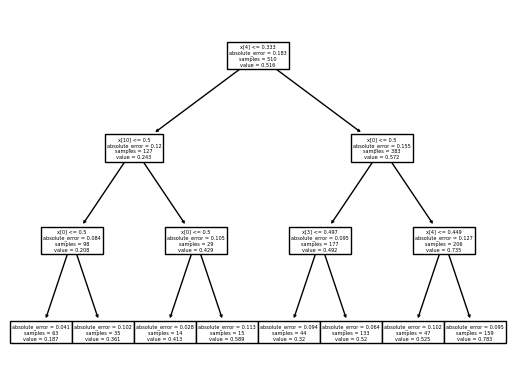

In [132]:
from sklearn import tree
tree.plot_tree(dtr)
plt.show()

In [133]:
## fitting a decision tree regressor using squared error criterian
dtr1=DecisionTreeRegressor(criterion="squared_error",max_depth=3)
dtr1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [134]:
y_pred1=dtr1.predict(x_test)
y_pred1

array([0.19977045, 0.77269772, 0.77269772, 0.77269772, 0.40559902,
       0.38039084, 0.38039084, 0.77269772, 0.40559902, 0.40559902,
       0.50363979, 0.40559902, 0.50363979, 0.38039084, 0.77269772,
       0.38039084, 0.5603667 , 0.19977045, 0.50363979, 0.50363979,
       0.19977045, 0.50363979, 0.50363979, 0.38039084, 0.40559902,
       0.40559902, 0.50363979, 0.38039084, 0.19977045, 0.38039084,
       0.50363979, 0.50363979, 0.19977045, 0.40559902, 0.77269772,
       0.50363979, 0.38039084, 0.50363979, 0.77269772, 0.77269772,
       0.77269772, 0.50363979, 0.50363979, 0.77269772, 0.77269772,
       0.38039084, 0.5603667 , 0.5603667 , 0.50363979, 0.50363979,
       0.77269772, 0.38039084, 0.51794754, 0.40559902, 0.77269772,
       0.19977045, 0.77269772, 0.38039084, 0.5603667 , 0.40559902,
       0.77269772, 0.77269772, 0.19977045, 0.38039084, 0.19977045,
       0.50363979, 0.50363979, 0.19977045, 0.77269772, 0.38039084,
       0.77269772, 0.77269772, 0.38039084, 0.38039084, 0.50363

In [135]:
r2_score(y_test,y_pred1)

0.7390408892432705

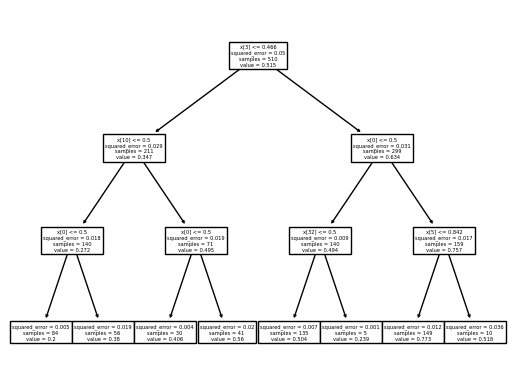

In [136]:
from sklearn import tree
tree.plot_tree(dtr1)
plt.show()

In [137]:
## fitting a decision tree regressor using friedman mse criterian
dtr2=DecisionTreeRegressor(criterion="friedman_mse",max_depth=3)
dtr2.fit(x_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [138]:
y_pred2=dtr2.predict(x_test)
y_pred2

array([0.19977045, 0.77269772, 0.77269772, 0.77269772, 0.40559902,
       0.38039084, 0.38039084, 0.77269772, 0.40559902, 0.40559902,
       0.50363979, 0.40559902, 0.50363979, 0.38039084, 0.77269772,
       0.38039084, 0.5603667 , 0.19977045, 0.50363979, 0.50363979,
       0.19977045, 0.50363979, 0.50363979, 0.38039084, 0.40559902,
       0.40559902, 0.50363979, 0.38039084, 0.19977045, 0.38039084,
       0.50363979, 0.50363979, 0.19977045, 0.40559902, 0.77269772,
       0.50363979, 0.38039084, 0.50363979, 0.77269772, 0.77269772,
       0.77269772, 0.50363979, 0.50363979, 0.77269772, 0.77269772,
       0.38039084, 0.5603667 , 0.5603667 , 0.50363979, 0.50363979,
       0.77269772, 0.38039084, 0.51794754, 0.40559902, 0.77269772,
       0.19977045, 0.77269772, 0.38039084, 0.5603667 , 0.40559902,
       0.77269772, 0.77269772, 0.19977045, 0.38039084, 0.19977045,
       0.50363979, 0.50363979, 0.19977045, 0.77269772, 0.38039084,
       0.77269772, 0.77269772, 0.38039084, 0.38039084, 0.50363

In [139]:
r2_score(y_test,y_pred1)

0.7390408892432705

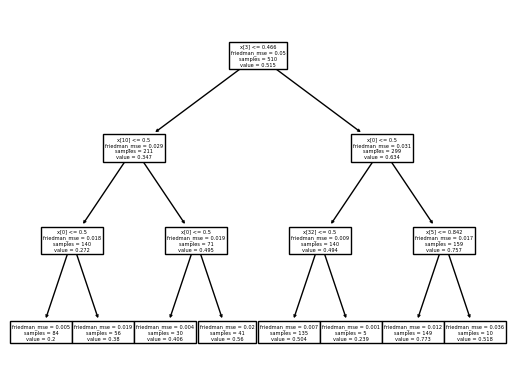

In [140]:
from sklearn import tree
tree.plot_tree(dtr2)
plt.show()

# Ridge Regression Model

In [141]:
## ftting a ridge regresion model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(x_train, y_train)

Ridge(alpha=0.5)

In [142]:
y_pred = ridge.predict(x_test)
y_pred

array([ 0.07709245,  0.73183341,  0.86084866,  0.7600722 ,  0.44548428,
        0.23430164,  0.40693919,  0.83768067, -0.01508582,  0.3562633 ,
        0.44272458,  0.49328501,  0.54160921,  0.38741533,  0.87865836,
        0.57747745,  0.5905976 ,  0.09610837,  0.58800445,  0.39954257,
        0.2417618 ,  0.52314046,  0.49984244,  0.60438553,  0.2642047 ,
        0.34253059,  0.33834624,  0.54699094,  0.28260805,  0.36834058,
        0.63068557,  0.53305725,  0.45475888,  0.32817049,  0.64635945,
        0.42522583,  0.53784638,  0.55092518,  0.82267627,  0.93906086,
        0.66333048,  0.52203499,  0.47702273,  0.84364869,  0.83656083,
        0.34533455,  0.5890589 ,  0.7180251 ,  0.58788838,  0.51693343,
        0.75844879,  0.35426539,  0.52534086,  0.35384728,  0.79240167,
        0.1866924 ,  0.86372358,  0.33123095,  0.61579745,  0.46181851,
        0.76523281,  0.85027095,  0.12792139,  0.45761609,  0.29167901,
        0.48883521,  0.60450929,  0.21765044,  0.84375693,  0.30

In [143]:
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 0.009865749745935782


In [144]:
r2_score(y_test,y_pred)

0.8312428935332525

Polynomial Regression - 2nd degree

# Polinomial Regression

In [145]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(x_train_new5)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [146]:
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(x_train_new5))

In [147]:
x_test1 = x_test[x_train_new5.columns]

In [148]:
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(x_test1))

In [149]:
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

In [150]:
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)

R2_score (train):  0.8520887223134088
R2_score (test):  0.7982070186561169


In [151]:
x_train_new5.columns

Index(['yr', 'temp', 'season_1', 'season_4', 'mnth_9', 'mnth_11', 'mnth_12',
       'weekday_2', 'weathersit_1', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# Lasso and ElasticNet

In [152]:
## laso regression model fitt
from sklearn.linear_model import Lasso, ElasticNet
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [153]:
lasso_pred = lasso.predict(x_test)
lasso_pred

array([0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514

In [154]:
lasso_mse = mean_squared_error(y_test, lasso_pred)
print('Lasso regression MSE:', lasso_mse)

Lasso regression MSE: 0.058484179799635674


In [155]:
r2_score(y_test,lasso_pred)

-0.0003923889447254858

In [156]:
## fitt elasticnet model
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.5, l1_ratio=0.5)
enet.fit(x_train, y_train)

ElasticNet(alpha=0.5)

In [157]:
enet_pred = enet.predict(x_test)
enet_pred

array([0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514352,
       0.51514352, 0.51514352, 0.51514352, 0.51514352, 0.51514

In [158]:
r2_score(y_test,enet_pred)

-0.0003923889447254858

# Support Vector Machine(SVM) Regressor

In [159]:
# fitting a SVM Regressor 
from sklearn.svm import SVR
model_rbf = SVR(kernel = "rbf",gamma=0.1,C=1.0)
model_rbf

SVR(gamma=0.1)

In [160]:
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)
pred_test_rbf

array([ 0.1045201 ,  0.725785  ,  0.79727007,  0.73982852,  0.43428781,
        0.21146022,  0.40789661,  0.7912583 , -0.02072267,  0.39765795,
        0.42910195,  0.49132915,  0.48958819,  0.32245762,  0.8775778 ,
        0.54430026,  0.56694067,  0.20412776,  0.58299756,  0.3926229 ,
        0.17376547,  0.51295373,  0.4619753 ,  0.57611616,  0.26255572,
        0.34947715,  0.39086813,  0.58095734,  0.24537325,  0.31896286,
        0.54146572,  0.48514313,  0.37799478,  0.35604692,  0.63400227,
        0.38750405,  0.51911715,  0.50454398,  0.81168611,  0.79479034,
        0.62309379,  0.4916673 ,  0.53370429,  0.78974033,  0.86287983,
        0.32950071,  0.55205148,  0.61441754,  0.55620496,  0.49098588,
        0.77991042,  0.35567879,  0.38500271,  0.30826882,  0.8364567 ,
        0.20718542,  0.80354372,  0.28489701,  0.54809624,  0.39751367,
        0.76890913,  0.82425215,  0.19523492,  0.42193489,  0.25871374,
        0.5389699 ,  0.56354252,  0.27083531,  0.86880603,  0.31

In [161]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_test))

0.8689640732120671


In [162]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred_test_rbf)
print('Mean squared error: ', mse)

Mean squared error:  0.009736738260620046


In [163]:
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 0.09867491201222349


# We have fitted some regression models from that we just want to choose Random Forest Regressor and Support Vector Machine because
## of thiere highest R^2 scores.

In [165]:
# saving the model 
import pickle 
pickle_out = open("bikeanalysis.pkl", mode = "wb") #opened for writing in binary mode
pickle.dump(regressor_poly2, pickle_out) 
pickle_out.close()